### 1. PageRank节点重要度

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
G = nx.star_graph(7)

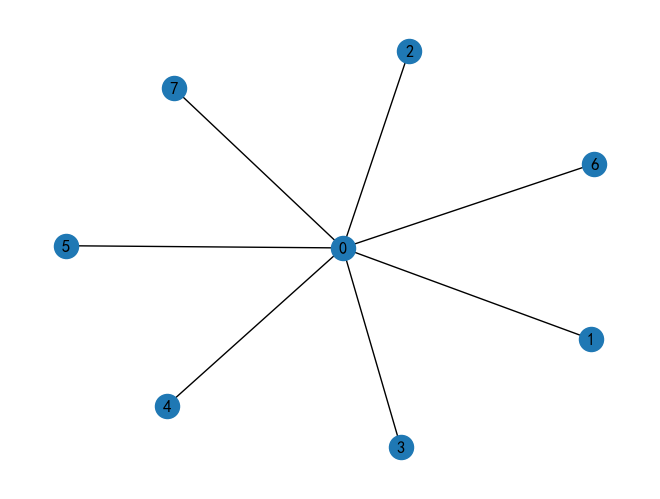

In [3]:
nx.draw(G, with_labels=True)

In [4]:
pagerank=nx.pagerank(G, alpha=0.8)

In [8]:
nx.pagerank?

Signature:
nx.pagerank(
    G,
    alpha=0.85,
    personalization=None,
    max_iter=100,
    tol=1e-06,
    nstart=None,
    weight='weight',
    dangling=None,
)
Docstring:
Returns the PageRank of the nodes in the graph.

PageRank computes a ranking of the nodes in the graph G based on
the structure of the incoming links. It was originally designed as
an algorithm to rank web pages.

Parameters
----------
G : graph
  A NetworkX graph.  Undirected graphs will be converted to a directed
  graph with two directed edges for each undirected edge.

alpha : float, optional
  Damping parameter for PageRank, default=0.85.

personalization: dict, optional
  The "personalization vector" consisting of a dictionary with a
  key some subset of graph nodes and personalization value each of those.
  At least one personalization value must be non-zero.
  If not specfiied, a nodes personalization value will be zero.
  By default, a uniform distribution is used.

max_iter : integer, optional
  Maximum

In [5]:
pagerank

{0: 0.4583348922684132,
 1: 0.07738072967594098,
 2: 0.07738072967594098,
 3: 0.07738072967594098,
 4: 0.07738072967594098,
 5: 0.07738072967594098,
 6: 0.07738072967594098,
 7: 0.07738072967594098}

### 2. 节点连接数Node Degree度分析

In [9]:
G = nx.gnp_random_graph(100, 0.02, seed=10374196)

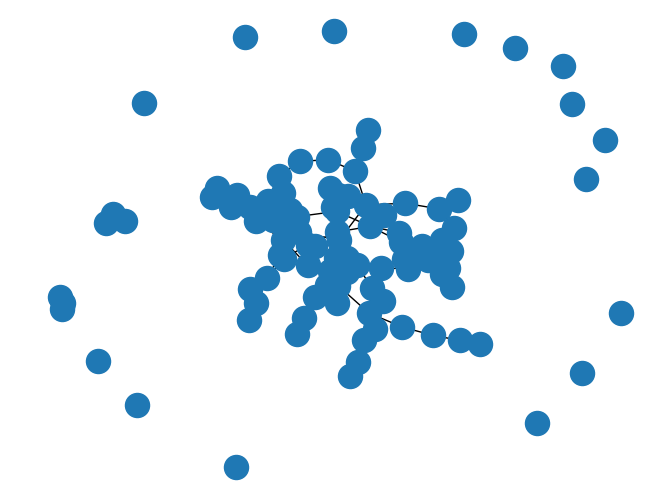

In [10]:
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)

In [11]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

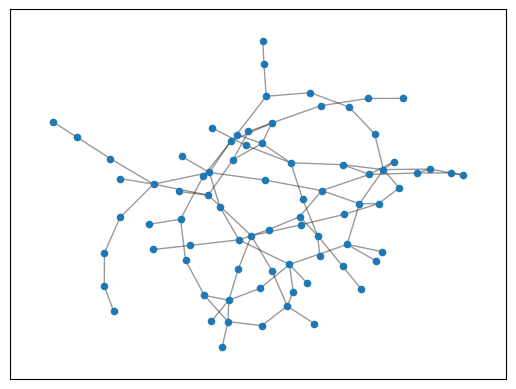

In [12]:
pos = nx.spring_layout(Gcc, seed=10396953)

nx.draw_networkx_nodes(Gcc, pos, node_size = 20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

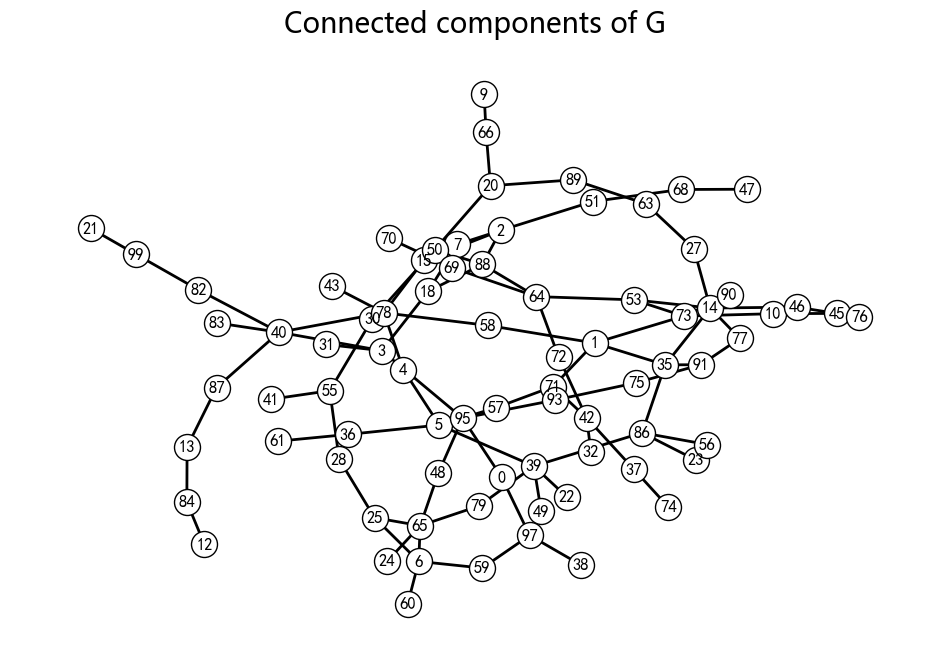

In [13]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(Gcc, seed=10396953)

options = {
    "font_size": 12,
    "node_size": 350,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 2,
}

nx.draw_networkx(Gcc, pos, **options)

plt.title('Connected components of G', fontsize = 20)
plt.axis('off')
plt.show()

### 3. 图特征分析

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False

In [15]:
G = nx.lollipop_graph(4, 7)

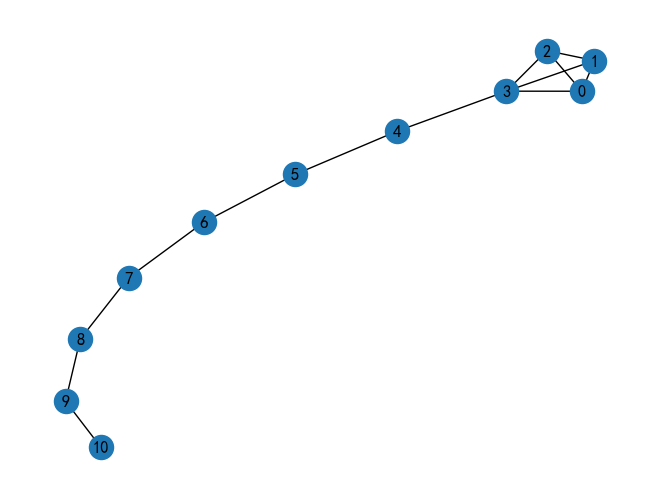

In [16]:
pos = nx.spring_layout(G, seed=3068)
nx.draw(G, pos=pos, with_labels =True)
plt.show()

In [20]:
# 半径
nx.radius(G)

4

In [18]:
# 直径
nx.diameter(G)

8

In [19]:
# 偏心度：每个节点到图中其他节点的最远距离
nx.eccentricity(G)

{0: 8, 1: 8, 2: 8, 3: 7, 4: 6, 5: 5, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}

In [21]:
# 中心节点，偏心度与半径相等的节点
nx.center(G)

[6]

In [22]:
# 外围节点，偏心度与直径相等的节点
nx.periphery(G)

[0, 1, 2, 10]

### 4. 计算节点特征

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [55]:
# 可视化辅助函数
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=10,
                                   cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=0.5,
                                      base=10))
    edges=nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [25]:
G = nx.karate_club_graph()

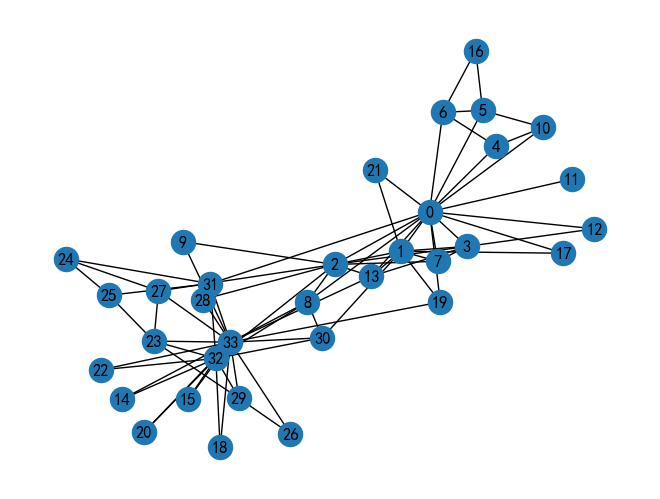

In [26]:
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos, with_labels=True)

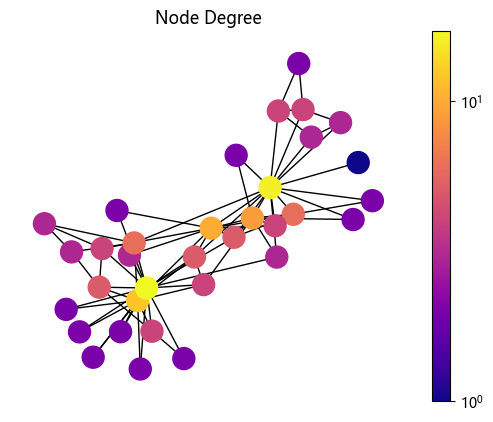

In [29]:
draw(G, pos, dict(G.degree()), 'Node Degree')

#### 节点重要度（中心度）

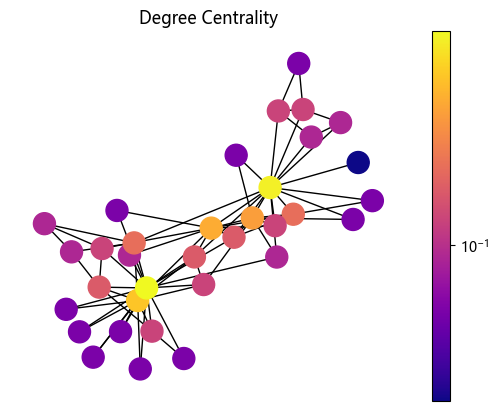

In [30]:
# 节点重要度（中心度）
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

#### 特征向量中心度

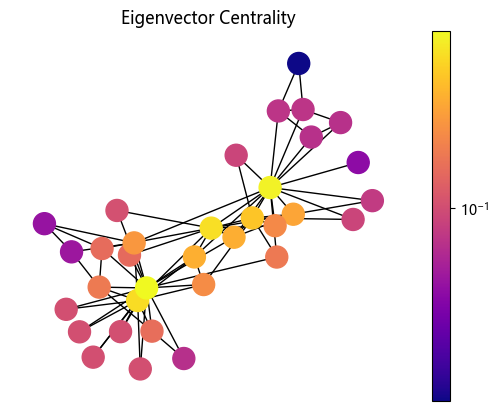

In [31]:
# 特征向量中心度
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

#### Betweenness Centraity 必经之路

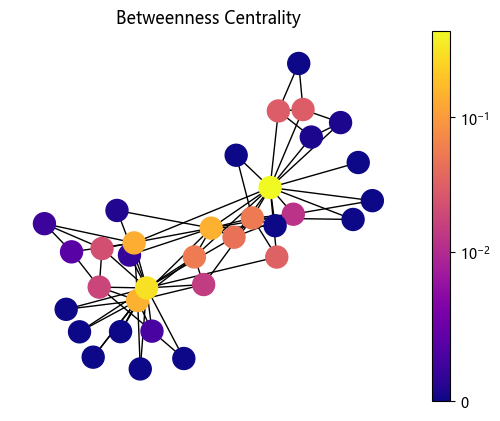

In [32]:
# Betweenness Centraity 必经之路
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

#### Closeness Centrality

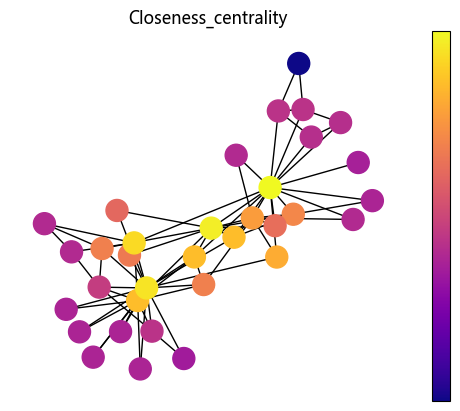

In [34]:
# Closeness Centrality
draw(G, pos, nx.closeness_centrality(G), "Closeness_centrality")

#### 实战

In [35]:
# 字典安置排序辅助函数
def dict_sort_by_value(dict_input):
    return sorted(dict_input.items(), key=lambda x:x[1], reverse=True)

In [37]:
import pandas as pd
df = pd.read_csv('shanghai_subway.csv')
df

,前一站,后一站,地铁线,时间（分钟）
0,莘庄,外环路,1,2
1,外环路,莲花路,1,2
2,莲花路,锦江乐园,1,3
3,锦江乐园,上海南站,1,3
4,上海南站,漕宝路,1,3
...,...,...,...,...
487,抚顺路,国权路,18,2
488,国权路,复旦大学,18,3
489,复旦大学,上海财经大学,18,2
490,上海财经大学,殷高路,18,2


In [38]:
G = nx.Graph()

In [39]:
for idx, row in df.iterrows():
    G.add_edges_from([(row['前一站'], row['后一站'])], line=row['地铁线'], time = row['时间（分钟）'])

In [43]:
G.edges(data=True)

EdgeDataView([('莘庄', '外环路', {'line': 1, 'time': 2}), ('莘庄', '春申路', {'line': 5, 'time': 2}), ('外环路', '莲花路', {'line': 1, 'time': 2}), ('莲花路', '锦江乐园', {'line': 1, 'time': 3}), ('锦江乐园', '上海南站', {'line': 1, 'time': 3}), ('上海南站', '漕宝路', {'line': 1, 'time': 3}), ('上海南站', '石龙路', {'line': 3, 'time': 2}), ('上海南站', '华东理工大学', {'line': 15, 'time': 2}), ('上海南站', '桂林公园', {'line': 15, 'time': 3}), ('漕宝路', '上海体育馆', {'line': 1, 'time': 3}), ('漕宝路', '桂林公园', {'line': 12, 'time': 2}), ('漕宝路', '龙漕路', {'line': 12, 'time': 3}), ('上海体育馆', '徐家汇', {'line': 1, 'time': 2}), ('上海体育馆', '上海体育场', {'line': 4, 'time': 2}), ('上海体育馆', '宜山路', {'line': 4, 'time': 2}), ('徐家汇', '衡山路', {'line': 1, 'time': 2}), ('徐家汇', '宜山路', {'line': 9, 'time': 3}), ('徐家汇', '肇嘉浜路', {'line': 9, 'time': 2}), ('徐家汇', '交通大学', {'line': 11, 'time': 2}), ('徐家汇', '上海游泳馆', {'line': 11, 'time': 3}), ('衡山路', '常熟路', {'line': 1, 'time': 2}), ('常熟路', '陕西南路', {'line': 1, 'time': 2}), ('常熟路', '静安寺', {'line': 7, 'time': 2}), ('常熟路', '肇嘉浜路', {'line': 7, 'time':

In [44]:
pos = nx.spring_layout(G, seed=123)

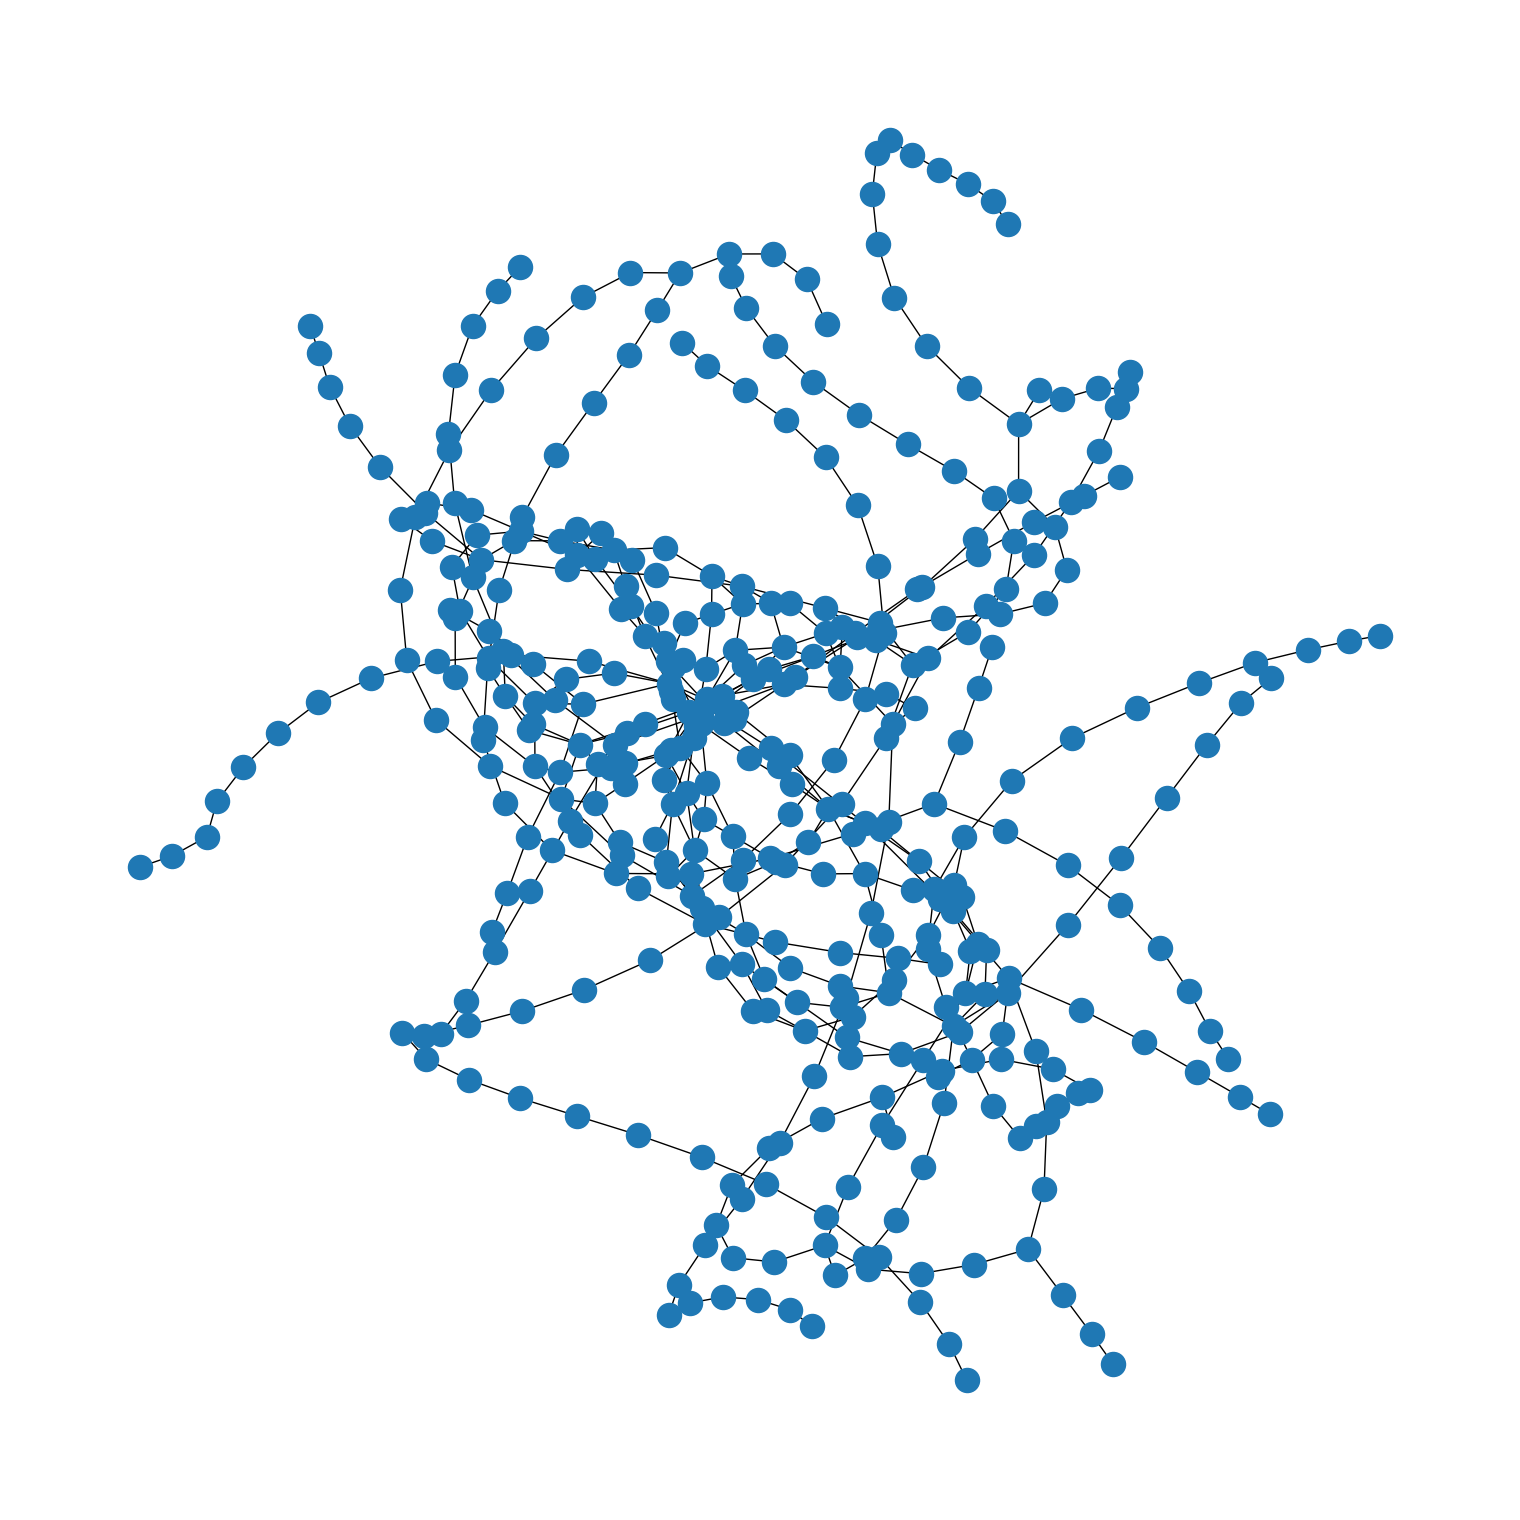

In [45]:
plt.figure(figsize=(15, 15))
nx.draw(G, pos=pos)

##### 实战1 Short Path 最短路

In [46]:
nx.has_path(G, source='昌吉东路', target='同济大学')

True

In [47]:
nx.shortest_path(G, source='昌吉东路', target="同济大学", weight='time')

['昌吉东路',
 '上海赛车场',
 '嘉定新城',
 '马陆',
 '陈翔公路',
 '南翔',
 '桃浦新村',
 '武威路',
 '祁连山路',
 '李子园',
 '上海西站',
 '真如',
 '枫桥路',
 '曹杨路',
 '镇坪路',
 '中潭路',
 '上海火车站',
 '宝山路',
 '海伦路',
 '邮电新村',
 '四平路',
 '同济大学']

In [48]:
nx.shortest_path_length(G, source='昌吉东路', target="同济大学", weight='time')

59

In [49]:
nx.average_shortest_path_length(G, weight='time')

41.06494956638255

##### Node Degree

In [50]:
dict(G.degree())

{'莘庄': 2,
 '外环路': 2,
 '莲花路': 2,
 '锦江乐园': 2,
 '上海南站': 5,
 '漕宝路': 4,
 '上海体育馆': 4,
 '徐家汇': 6,
 '衡山路': 2,
 '常熟路': 4,
 '陕西南路': 6,
 '一大会址·黄陂南路': 4,
 '人民广场': 6,
 '新闸路': 2,
 '汉中路': 6,
 '上海火车站': 4,
 '中山北路': 2,
 '延长路': 2,
 '上海马戏城': 2,
 '汶水路': 2,
 '彭浦新村': 2,
 '共康路': 2,
 '通河新村': 2,
 '呼兰路': 2,
 '共富新村': 2,
 '宝安公路': 2,
 '友谊西路': 2,
 '富锦路': 1,
 '徐泾东': 1,
 '虹桥火车站': 4,
 '虹桥2号航站楼': 3,
 '淞虹路': 2,
 '北新泾': 2,
 '威宁路': 2,
 '娄山关路': 4,
 '中山公园': 4,
 '江苏路': 4,
 '静安寺': 6,
 '南京西路': 6,
 '南京东路': 4,
 '陆家嘴': 4,
 '东昌路': 2,
 '世纪大道': 7,
 '上海科技馆': 2,
 '世纪公园': 2,
 '龙阳路': 7,
 '张江高科': 2,
 '金科路': 2,
 '广兰路': 2,
 '唐镇': 2,
 '创新中路': 2,
 '华夏东路': 2,
 '川沙': 2,
 '凌空路': 2,
 '远东大道': 2,
 '海天三路': 2,
 '浦东国际机场': 1,
 '石龙路': 2,
 '龙漕路': 4,
 '漕溪路': 2,
 '宜山路': 5,
 '虹桥路': 4,
 '延安西路': 2,
 '金沙江路': 4,
 '曹杨路': 6,
 '镇坪路': 4,
 '中潭路': 2,
 '宝山路': 3,
 '东宝兴路': 2,
 '虹口足球场': 4,
 '赤峰路': 2,
 '大柏树': 2,
 '江湾镇': 2,
 '殷高西路': 2,
 '长江南路': 3,
 '淞发路': 2,
 '张华浜': 2,
 '淞滨路': 2,
 '水产路': 2,
 '宝杨路': 2,
 '友谊路': 2,
 '铁力路': 2,
 '江杨北路': 1,
 '海伦路': 4,
 '临平路': 2,
 '大连路': 4,
 '杨树浦

In [51]:
dict_sort_by_value(dict(G.degree()))

[('世纪大道', 7),
 ('龙阳路', 7),
 ('徐家汇', 6),
 ('陕西南路', 6),
 ('人民广场', 6),
 ('汉中路', 6),
 ('静安寺', 6),
 ('南京西路', 6),
 ('曹杨路', 6),
 ('上海南站', 5),
 ('宜山路', 5),
 ('东方体育中心', 5),
 ('漕宝路', 4),
 ('上海体育馆', 4),
 ('常熟路', 4),
 ('一大会址·黄陂南路', 4),
 ('上海火车站', 4),
 ('虹桥火车站', 4),
 ('娄山关路', 4),
 ('中山公园', 4),
 ('江苏路', 4),
 ('南京东路', 4),
 ('陆家嘴', 4),
 ('龙漕路', 4),
 ('虹桥路', 4),
 ('金沙江路', 4),
 ('镇坪路', 4),
 ('虹口足球场', 4),
 ('海伦路', 4),
 ('大连路', 4),
 ('浦东大道', 4),
 ('西藏南路', 4),
 ('大木桥路', 4),
 ('东安路', 4),
 ('东明路', 4),
 ('高科西路', 4),
 ('民生路', 4),
 ('云山路', 4),
 ('巨峰路', 4),
 ('长寿路', 4),
 ('肇嘉浜路', 4),
 ('龙华中路', 4),
 ('长清路', 4),
 ('耀华路', 4),
 ('成山路', 4),
 ('陆家浜路', 4),
 ('老西门', 4),
 ('大世界', 4),
 ('曲阜路', 4),
 ('四平路', 4),
 ('江浦路', 4),
 ('桂林路', 4),
 ('嘉善路', 4),
 ('马当路', 4),
 ('杨高中路', 4),
 ('蓝天路', 4),
 ('交通大学', 4),
 ('一大会址·新天地', 4),
 ('豫园', 4),
 ('天潼路', 4),
 ('国权路', 4),
 ('上海西站', 4),
 ('真如', 4),
 ('隆德路', 4),
 ('龙华', 4),
 ('御桥', 4),
 ('罗山路', 4),
 ('桂林公园', 4),
 ('江浦公园', 4),
 ('大渡河路', 4),
 ('武宁路', 4),
 ('莲溪路', 4),
 ('华夏中路', 4),
 ('铜川路', 4

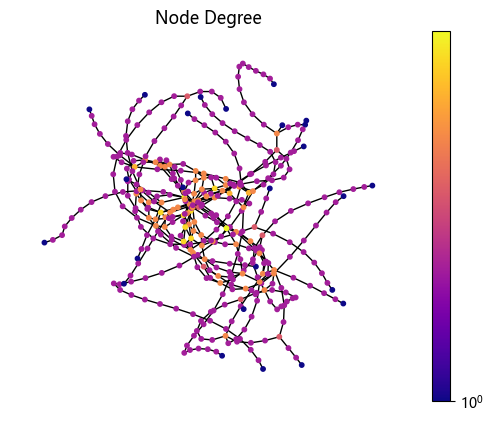

In [56]:
draw(G, pos, dict(G.degree()), 'Node Degree')